In [2]:
import tensorflow as tf
#usually tensorflow.keras.models hota hai. but we are writing so 
#because we have the keras file directly installed
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from keras.models import Sequential

import numpy as nump

import matplotlib.pyplot as plot

In [3]:
#Going to do binary image classification with cnn with tensorflow 

"""Data set loading..."""


#importing images here
L_train= nump.loadtxt("Image Classification CNN Keras Dataset/input.csv" , delimiter=",")
M_train= nump.loadtxt("Image Classification CNN Keras Dataset/labels.csv" , delimiter=",")

L_test= nump.loadtxt("Image Classification CNN Keras Dataset/input_test.csv" , delimiter=",")
M_test= nump.loadtxt("Image Classification CNN Keras Dataset/labels_test.csv" , delimiter=",")



In [4]:
L_train=nump.reshape(L_train,(len(L_train),100,100,3))
L_test=nump.reshape(L_test,(len(L_test),100,100,3))




In [5]:
L_train= L_train/255.0
L_test=L_test/255.0


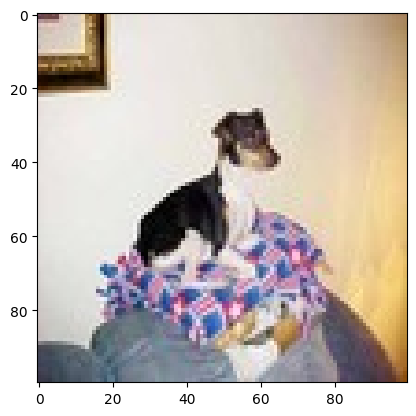

In [6]:
plot.imshow(L_test[0])
plot.imshow(L_test[0])

In [7]:
model=Sequential([
    Conv2D(32 , (3,3),activation="relu",input_shape=(100,100,3)),
    MaxPool2D((2,2)),

    Conv2D(32,(3,3),activation="relu"),
    MaxPool2D((2,2)),

    Flatten(),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid")
    
])

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
model.fit(L_train, M_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 20s 534ms/step - loss: 0.7223 - accuracy: 0.4990
Epoch 2/10
32/32 [==============================] - 19s 582ms/step - loss: 0.6798 - accuracy: 0.5865
Epoch 3/10
32/32 [==============================] - 18s 552ms/step - loss: 0.6457 - accuracy: 0.6380
Epoch 4/10
32/32 [==============================] - 17s 514ms/step - loss: 0.5969 - accuracy: 0.7075
Epoch 5/10
32/32 [==============================] - 19s 583ms/step - loss: 0.5550 - accuracy: 0.7215
Epoch 6/10
32/32 [==============================] - 17s 520ms/step - loss: 0.5001 - accuracy: 0.7660
Epoch 7/10
32/32 [==============================] - 17s 538ms/step - loss: 0.4332 - accuracy: 0.8090
Epoch 8/10
32/32 [==============================] - 18s 557ms/step - loss: 0.3776 - accuracy: 0.8395
Epoch 9/10
32/32 [==============================] - 17s 513ms/step - loss: 0.2999 - accuracy: 0.8755
Epoch 10/10
32/32 [==============================] - 17s 538ms/step - loss: 0.2409 - accura

In [10]:
model.fit(L_train, M_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 17s 531ms/step - loss: 0.1918 - accuracy: 0.9325
Epoch 2/10
32/32 [==============================] - 17s 547ms/step - loss: 0.1524 - accuracy: 0.9455
Epoch 3/10
32/32 [==============================] - 18s 553ms/step - loss: 0.1087 - accuracy: 0.9695
Epoch 4/10
32/32 [==============================] - 16s 511ms/step - loss: 0.0727 - accuracy: 0.9810
Epoch 5/10
32/32 [==============================] - 16s 508ms/step - loss: 0.0616 - accuracy: 0.9835
Epoch 6/10
32/32 [==============================] - 17s 521ms/step - loss: 0.0303 - accuracy: 0.9970
Epoch 7/10
32/32 [==============================] - 19s 591ms/step - loss: 0.0226 - accuracy: 0.9975
Epoch 8/10
32/32 [==============================] - 17s 521ms/step - loss: 0.0133 - accuracy: 0.9995
Epoch 9/10
32/32 [==============================] - 16s 508ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 16s 511ms/step - loss: 0.0065 - accura

In [11]:
model.fit(L_test,M_test)

13/13 [==============================] - 4s 277ms/step - loss: 1.1275 - accuracy: 0.6475


In [12]:
model.evaluate(L_test,M_test)

13/13 [==============================] - 1s 78ms/step - loss: 0.5704 - accuracy: 0.7000


[0.5703780651092529, 0.699999988079071]

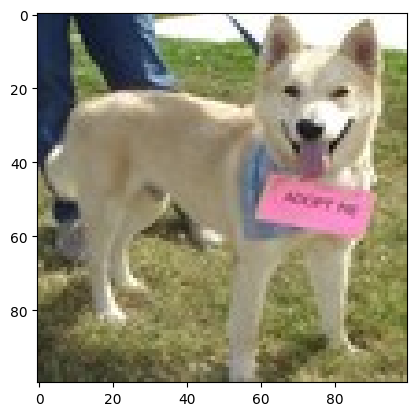

1/1 [==============================] - 0s 59ms/step
Our model says it is a : dog


In [18]:
import random
idx2 = random.randint(0, len(M_test))
plot.imshow(L_test[idx2, :])
plot.show()

y_pred = model.predict(L_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

In [27]:
import requests

x=input("Enter the Url of the image=")
from io import BytesIO

response=requests.get(x)
print(BytesIO(response.content))
#plot.imshow(BytesIO(response.content))